In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part (a)

First let's process the data.

In [194]:
with open('car_data.txt') as f:
    rows = [line.split() for line in f]

In [195]:
df = pd.DataFrame.from_records(rows, columns = ['make/model', 'vol', 'hp', 'mpg', 'sp', 'wt'])

In [196]:
df

,make/model,vol,hp,mpg,sp,wt
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0
...,...,...,...,...,...,...
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0


In [197]:
df['hp'] = df['hp'].astype('int')

In [198]:
df['mpg'] = df['mpg'].astype('float')

We take 'hp' as our only feature. So $X$ will be 'hp' and $Y$ will be 'mpg.'

In [199]:
Y = df['mpg'].to_numpy()

In [200]:
X = df['hp'].to_numpy()

Here we compute the coefficients for the linear regression.

In [201]:
beta1 = np.dot(X - X.mean(), Y - Y.mean()) / np.linalg.norm(X - X.mean())**2

In [202]:
beta0 = Y.mean() - beta1*X.mean()

In [203]:
print(f'Regression line: y = {beta0:.4f} + {beta1:.4f}x')

Regression line: y = 50.0661 + -0.1390x


Let's plot the regression line together with the data points.

In [204]:
xmin = X.min()

In [205]:
xmax = X.max()

Text(0, 0.5, 'Miles per gallon')

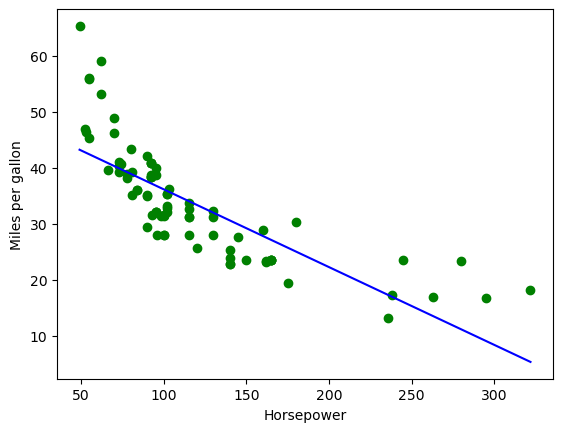

In [206]:
plt.plot(np.linspace(xmin, xmax, 2),
         beta0 + beta1*np.linspace(xmin, xmax, 2), color='blue')
plt.scatter(X, Y, color='green')
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

So we see that horsepower is negatively correlated with MPG, as is to be expected. Let's compute the mean squared training error and the Wald statistics for whether the coefficients we computed are non-zero.

In [207]:
res = Y - (beta0 + beta1 * X)

In [208]:
mse = (res**2).mean()

Assuming normal errors $\epsilon_i|X_i \sim N(0,\sigma^2)$, $\sigma$ is estimated as $\hat\sigma$, the mean squared error.

In [209]:
sigma_hat = np.sqrt(mse)

In [210]:
s_X = np.sqrt(X.var())

In [211]:
n = len(X)

Here we calculate the Wald statistics for $\beta_0$ and $\beta_1$.

In [212]:
se_beta0 = (sigma_hat / (s_X * np.sqrt(n))) * np.sqrt((X**2).mean())

In [213]:
wald_beta0 = beta0 / se_beta0

In [214]:
se_beta1 = (sigma_hat / (s_X * np.sqrt(n)))

In [215]:
wald_beta1 = beta1 / se_beta1

In [216]:
print(f'Mean squared error: {mse:.4f}')
print(f'Wald statistic for beta_0: {wald_beta0:.4f}')
print(f'Wald statistic for beta_1: {wald_beta1:.4f}')

Mean squared error: 37.1882
Wald statistic for beta_0: 32.2959
Wald statistic for beta_1: -11.6624


# Part (b)

In [217]:
Y = np.log(df['mpg'].to_numpy())

In [218]:
X = df['hp'].to_numpy()

In [219]:
beta1 = np.dot(X - X.mean(), Y - Y.mean()) / np.linalg.norm(X - X.mean())**2

In [220]:
beta0 = Y.mean() - beta1*X.mean()

In [221]:
xmin = X.min()

In [222]:
xmax = X.max()

In [223]:
print(f'Regression line: y = {beta0:.4f} + {beta1:.4f}x')

Regression line: y = 4.0132 + -0.0046x


Text(0, 0.5, 'Miles per gallon')

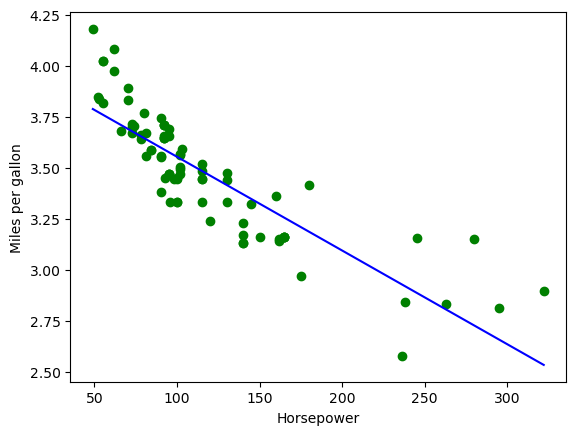

In [224]:
plt.plot(np.linspace(xmin, xmax, 2),
         beta0 + beta1*np.linspace(xmin, xmax, 2), color='blue')
plt.scatter(X, Y, color='green')
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

Let's compute the mean squared training error and Wald statistics, as before.

In [225]:
res = Y - (beta0 + beta1 * X)

In [226]:
mse = (res**2).mean()

Let's also compute the mean squared error when we exponentiate $Y$ and the predictions from $X$.

In [227]:
comp_res = np.exp(Y) - np.exp(beta0 + beta1 * X)

In [228]:
comp_mse = (comp_res**2).mean()

Here we compute the Wald statistics.

In [229]:
sigma_hat = np.sqrt(mse)

In [230]:
s_X = np.sqrt(X.var())

In [231]:
n = len(X)

In [232]:
se_beta0 = (sigma_hat / (s_X * np.sqrt(n))) * np.sqrt((X**2).mean())

In [233]:
wald_beta0 = beta0 / se_beta0

In [234]:
se_beta1 = (sigma_hat / (s_X * np.sqrt(n)))

In [235]:
wald_beta1 = beta1 / se_beta1

In [236]:
print(f'Mean squared error: {mse:.4f}')
print(f'Mean squared error after exponentiating: {comp_mse:.4f}')
print(f'Wald statistic for beta_0: {wald_beta0:.4f}')
print(f'Wald statistic for beta_1: {wald_beta1:.4f}')

Mean squared error: 0.0243
Mean squared error after exponentiating: 29.0044
Wald statistic for beta_0: 101.2637
Wald statistic for beta_1: -15.0579


We see that the Wald statistics are much higher than before. In addition, after exponentiating $Y=\log(\text{MPG})$ and the predictions $\hat Y=\beta_0 + \beta_1 X$, we see that the mean squared error is smaller than before. So it seems that a model of the form $Y = e^{\beta_0 + \beta_1 X}$ fits the data better.